# Regression analysis with interaction effects
*av Anders Sundell*

Regression analysis is used to investigate relationships between variables, with or without control for other vairables. However, in the real world, we often find that relationships are different in different sub-groups of the population, or during different circumstances. The effect of becoming a parent is for instance different among women and men; women see a much larger drop in incomes.

How to account for this in our analyses? One way is to run two separate analyses, one for each group we are interested in (in this case women and men). We then get the effect of becoming a parent among men, and among women.

But we can also do this in one single regression analysis. We then get a sense of how much the effect differs between groups, and also whether the *difference* in effect is statistically significant. We can then decide whether it is worth the effort to complicate our theoretical model by introducing these separate effects. We can then also hold the effects of all control variables constant. If we run two separate analyses, the control variables would also get different effects in the two models, and that might not be part of our theory.

__This is called an interaction analysis. It can also be called a moderation analysis, or that we are investigating conditional effects. It means that we let the effect of one variable vary over the values of another variable.__ It is often graphically represented by a a diagram with an arrow pointing at another arrow. The third variable in this schematic affects *the effect* of the main independent variable, rather than *the value* of the independent and dependent variables.

<img src = "../images/interaction_en.png" alt="An interaktion" width=451>

In this guide we will discuss how to do regression analyses where both independent variable and interaction variable only has two values, and how to best present the results.

We will work with data from the american <a href="http://gss.norc.org/get-the-data/stata">General Social Survey</a>, which is a survey with regular citizens, with questions about a lot of subjects. We will use the 2016 edition. Download the data and put it in your project folder to follow along in the example.

In [3]:
cd "/Users/xsunde/Dropbox/Jupyter/stathelp/data/"
use "GSS2016.dta", clear


/Users/xsunde/Dropbox/Jupyter/stathelp/data



## Prepare the data for analysis

The question to investigate is the one mentioned above: how becoming a parent affects incomes for women and men. We should really have longitudinal data to properly investigate the question. It would allow us to track individuals before and after they have kids. Since this is cross-sectional data, with information from one point in time, this is not possible. Our conclusions will thus be based on comparisons between parents and non-parents. Of course, this limits our ability to draw conclusions about cause and effect.

We need three variables: gender, income, and number of kids. Information about gender is found in the variable `sex` where 1 means "male" and 2 "female". To make results more easy to interpret later, we will recode the variable so men have the value 0 and women the value 1. We also rename the variable to "woman" instead of sex. When we increase our variable, it means that the respondent becomes "more woman", metaphorically speaking.

In [4]:
recode sex (1=0) (2=1), generate(woman)
tab woman


(2867 differences between sex and woman)


  RECODE of |
        sex |
(respondent |
     s sex) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,276       44.51       44.51
          1 |      1,591       55.49      100.00
------------+-----------------------------------
      Total |      2,867      100.00


We also need a variable for income. There are some to choose from, but the simplest seem to be `realrinc`, which expresses the respondent's income in dolalrs per year. We can see below that the mean is 23773.

In [5]:
sum realrinc


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    realrinc |      1,632    23772.92    29407.37        234     164382


Finally, we need a variable for the number of kids. There is one that shows exactly that, `childs`:

In [7]:
tab childs


    number of |
     children |      Freq.     Percent        Cum.
--------------+-----------------------------------
            0 |        797       27.88       27.88
            1 |        459       16.05       43.93
            2 |        733       25.64       69.57
            3 |        467       16.33       85.90
            4 |        213        7.45       93.35
            5 |         92        3.22       96.57
            6 |         51        1.78       98.36
            7 |         25        0.87       99.23
eight or more |         22        0.77      100.00
--------------+-----------------------------------
        Total |      2,859      100.00


In this guide we will only compare parents to non-parents, that is the zeros on the varibale to the rest. The largest effects are probably found when you get your first child. Now we create a dummy variable that has the value 0 for respondents without kids, and 1 for respondents with one or more kids. We call it `dum_kids`.

In [6]:
recode childs (0=0) (1/8 = 1), generate(dum_kids)
tab dum_kids


(1603 differences between childs and dum_kids)


  RECODE of |
     childs |
 (number of |
  children) |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        797       27.88       27.88
          1 |      2,062       72.12      100.00
------------+-----------------------------------
      Total |      2,859      100.00


We now have all the variables we need for the analysis. We can start by doing a correlation matrix that shows how the variables are related, and we also add the variable `age`, that shows the respondent's age. We will include it as a control variable later on.

In [7]:
pwcorr woman realrinc dum_kids age


             |    woman realrinc dum_kids      age
-------------+------------------------------------
       woman |   1.0000 
    realrinc |  -0.1628   1.0000 
    dum_kids |   0.1047   0.0821   1.0000 
         age |   0.0418   0.1332   0.3493   1.0000 


The correlation between woman and income is negative, which means that women earn less. More woman = less income. Woman is also positively correlated with having kids. Having kids is in turn positively correlated with incomes - possibly owing to the fact that parents are older, and older people have higher incomes. Age has a positive relationship both with incomes and kids.

## Interaction analysis where variables have two values

In the first analysis we will examine how being a parent is related to income, and then redo the analysis for women and men. But first we run a regular regression analysis, without interaction, where we just enter all variables like they are. The dependent variable is income.

In [8]:
reg realrinc woman dum_kids age 


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(3, 1623)      =     26.64
       Model |  6.5114e+10         3  2.1705e+10   Prob > F        =    0.0000
    Residual |  1.3225e+12     1,623   814854652   R-squared       =    0.0469
-------------+----------------------------------   Adj R-squared   =    0.0452
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28546

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       woman |  -9748.911   1421.057    -6.86   0.000    -12536.21   -6961.612
    dum_kids |    3603.04   1636.325     2.20   0.028     393.5083    6812.571
         age |   241.0386   52.86283     4.56   0.000      137.352    344.7252
       _cons |   15430.49   2452.935     6.29   0.

Results are as expected. The coefficient for `woman` is -9748, which means that women in general have 9748 less income (per year) than men, even when controlling for age and having kids.

The coefficient for age is 241, which means that for each extra year of age, the respondents in general have 241 dollars more in yearly income. Being a man does thus has the same effect on income as being $9748/241=40$ years older!

Parents on average have 3603 dollars more in yearly income (when controlling for age and gender).

The effect of having kids is here assumed to be the same for women and men, and we will now investigate whether that is a reasonable assumption. TO do so we need to add what is called an *interaction term*, a new variable that is the product of `woman` times `dum_kids`. Conveniently enough there are automatic functions for doing so in Stata, so we can let Stata create the variable within the analysis. We just add ## between the variables we want to interacti to get the interaction term automatically:

In [9]:
reg realrinc woman##dum_kids age


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(4, 1622)      =     23.62
       Model |  7.6368e+10         4  1.9092e+10   Prob > F        =    0.0000
    Residual |  1.3113e+12     1,622   808418921   R-squared       =    0.0550
-------------+----------------------------------   Adj R-squared   =    0.0527
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28433

--------------------------------------------------------------------------------
      realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
---------------+----------------------------------------------------------------
       1.woman |   -1673.06   2586.229    -0.65   0.518     -6745.76    3399.641
    1.dum_kids |    9213.15   2217.508     4.15   0.000     4863.668    13562.63
               |
woman#dum_kids |
          1 1  |  -11546.67   3094.776    -3.73   0.000    -17616.85   -5476.495
    

We now have a new variable in the table, `woman#dum_kids`. This is the interaction term. We can also note that the coefficients for `woman` and `dum_kids` changed a lot. They can now not be interpreted in the same way. __The coefficients now show the effect of the variable when the other variable in the interaction is zero.__ The variable `woman` shows the difference between women and men *that don't have kids.* The variable `dum_kids` shows the difference between parents and non-parents *among men*.

We need to add the coefficients with the interaction term to calculate what the effects are for the other groups. **The interaction term shows how the COEFFICIENTS change when the other variable increases with one unit.**

The "effect" of having kids is thus +9213.15 for men. To get the effect for women we need to add the `dum_kids` coefficient with the interaction term: $9213.15 - 11546.67 * 1 = -2333.52$. __This means that mothers have lower incomes than women who are not parents, while fathers have higher income than men who are not parents.__

Can we trust this difference in effects? Yes, since the interaction term is significant. It is unlikely that a difference in effects of this size would arise simply because of randomness in the sampling. If the interaction term had been insignificant, it would have been better to trust the simpler model without interaction term, both because it is easier to interpret, and because simpler models all else equal are preferrable (if the more complicated models don't add any explanatory power).

Conversely, women who don't have kids have 1673.06 lower incomes than men without kids. But how much lower are incomes for mothers compared to fathers? We get this effect by calculating $-1673.06 - 11546.67 * 1 = -13219.73$. The difference in incomes between men and women thus grows dramatically after having kids.

## Comparison with separate analyses

Let's now try to run the analysis in the other way, separating the sample on men and women. We then only include the variables `dum_kids` and `age` - woman cannot be included, as there will only be one gender in each analysis. To do these analyses, we use <a href="ifstatements_en.html" target="_new">if qualifiers</a> to separate the genders. First we get the analysis for men, and then for women. Not that we now have much fewer observations in the analysis:

In [16]:
reg realrinc dum_kids age if woman==0


      Source |       SS           df       MS      Number of obs   =       795
-------------+----------------------------------   F(2, 792)       =     15.24
       Model |  3.2066e+10         2  1.6033e+10   Prob > F        =    0.0000
    Residual |  8.3316e+11       792  1.0520e+09   R-squared       =    0.0371
-------------+----------------------------------   Adj R-squared   =    0.0346
       Total |  8.6522e+11       794  1.0897e+09   Root MSE        =     32434

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    dum_kids |   9325.868   2635.179     3.54   0.000     4153.107    14498.63
         age |   218.5634   86.61915     2.52   0.012     48.53316    388.5937
       _cons |   12652.01   3717.253     3.40   0.001     5355.177    19948.84
--------------------------------------------------

In [17]:
reg realrinc dum_kids age if woman==1


      Source |       SS           df       MS      Number of obs   =       832
-------------+----------------------------------   F(2, 829)       =      7.34
       Model |  8.4705e+09         2  4.2353e+09   Prob > F        =    0.0007
    Residual |  4.7807e+11       829   576687842   R-squared       =    0.0174
-------------+----------------------------------   Adj R-squared   =    0.0150
       Total |  4.8654e+11       831   585493068   Root MSE        =     24014

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    dum_kids |  -2404.498   1954.356    -1.23   0.219    -6240.567     1431.57
         age |   236.9486   61.97975     3.82   0.000     115.2929    358.6043
       _cons |   10289.93   2892.852     3.56   0.000     4611.756    15968.11
--------------------------------------------------

We can see that the coefficients for `dum_kids` are very similar to the ones we calculated in the previous analysis. For men the effect of having kids is +9326, while it was +9213 in the previous analysis. For women, the effect is -2404, and was -2334 in the previous analysis. The reason for why they are not exactly the same is because the effect of `age` here is allowed to vary - it is slightly higher for women than for men. When the control variable gets different coefficients, the other variables are affected as well. In the integrated analysis, `age` only had one coefficient (288, almost in the middle between 219 and 237).

This way of doing the analysis might seem more intuitive, but we don't get a significance test for the difference in effect. And we also here model an interaction with age and gender. If we don't have a theory about that, it is better to assume that the effect is the same, which we do in the other, integrated analysis.

## Presenting results when the values 

To interpret interaction effects is difficult (to most people). They therefore need to be presented in a more intutive way than a regression table. And the table also does not show whether the effect of having kids is significant for women or not.

In order to get the conditional effects, the coefficients for the variables over values of the other variables, we use the command `margins` together with options `dydx()` and `at()`. Dydx stands for delta Y and delta X. Delta is in mathematics used to signify change. We want to see how much Y (the dependent variable) changes when we increase X (the independnet variable). We use the `at` opion to tell Stata for which values of the interaction variable we want to see the marginal effect of the independent variable.

To get the effect of having kids for women and men we write the following. The margins command has to follow a regression command, and I have here suppressed the output of the regression table with `quietly`:

In [21]:
quietly reg realrinc woman##dum_kids age
margins, dydx(dum_kids) at(woman=(0 1))




Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : 1.dum_kids

1._at        : woman           =           0

2._at        : woman           =           1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
0.dum_kids   |  (base outcome)
-------------+----------------------------------------------------------------
1.dum_kids   |
         _at |
          1  |    9213.15   2217.508     4.15   0.000     4863.668    13562.63
          2  |  -2333.525   2277.746    -1.02   0.306    -6801.159     2134.11
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.


Since we wrote `at(woman=(0 1))` we get two coefficients: one when woman is 0, and one when woman is 1. We can then see that the coefficient for `dum_kids` is 9213.15 when `woman` is 0, and -2333.525 when `woman` is 1. Having kids is positive for men, and negative for women. The coefficients are the same as what we calculated by hand above. The negative effect for women is however not significant, since the p-value is 0.306.

We can illustrate this by just running the command `marginsplot` after the margins command. By adding the option `yline(0)` we also get a reference line, drawn at 0. If the confidence intervals do not cover the line, the variable is statistically significant.


  Variables that uniquely identify margins: woman

.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


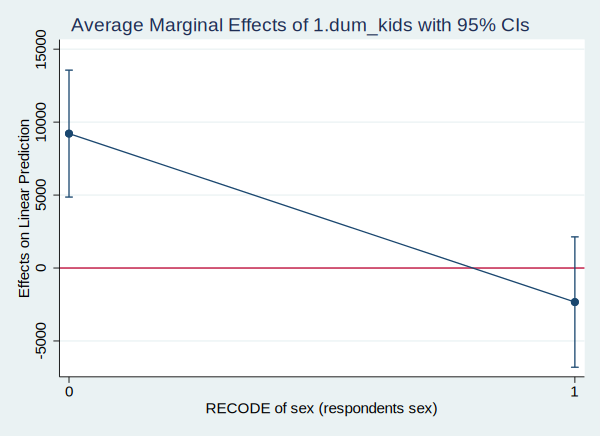


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [22]:
marginsplot, yline(0)

This is just a graphical representation of what we saw earlier. This is not predicted values; the Y-axis shows the EFFECT of having kids. The confidence intervals do not cover 0 when woman = 0, but when woman = 1, the confidence intervals do cover 0. This means (as we saw earlier) that only the positive effect for men is significant - the negative effect for women is insignificant.

In the same way, we can pull out the coefficients for `woman`, among the different values on `dum_kids`.

In [23]:
margins, dydx(woman) at(dum_kids=(0 1))


Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : 1.woman

1._at        : dum_kids        =           0

2._at        : dum_kids        =           1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
0.woman      |  (base outcome)
-------------+----------------------------------------------------------------
1.woman      |
         _at |
          1  |   -1673.06   2586.229    -0.65   0.518     -6745.76    3399.641
          2  |  -13219.73   1693.765    -7.80   0.000    -16541.93   -9897.537
------------------------------------------------------------------------------
Note: dy/dx for factor levels is the discrete change from the base level.


Women earn less than men, regardless if they have kids or not. But among those that do not have kids, the difference is insignificant. We only find a significant difference between men and women who have kids. We can also see this in the graph below:


  Variables that uniquely identify margins: dum_kids

.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


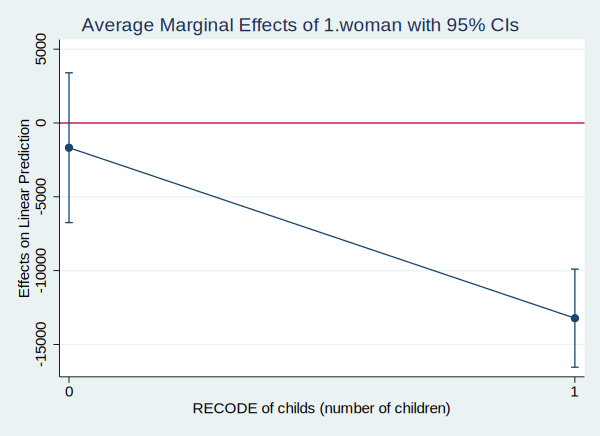


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [24]:
marginsplot, yline(0)

Finally, and most pedagogically, we can illustrate the whole relationship by calculating predicted values on the dependent variable, from the coefficients in the tables above. We do this with the `margins` command - this time without the `dydx` option.

In [25]:
margins, at(dum_kids=(0 1) woman=(0 1))


Predictive margins                              Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : woman           =           0
               dum_kids        =           0

2._at        : woman           =           0
               dum_kids        =           1

3._at        : woman           =           1
               dum_kids        =           0

4._at        : woman           =           1
               dum_kids        =           1

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         _at |
          1  |    22425.8   1777.756    12.61   0.000     18938.86    25912.74
          2  |   31638.95   1258.823    25.13   0.000     29169.86    34108.04
          3  |   20752.74   1944.967    10

This table does not show coefficients, but rather guesses on the dependent variable. The coefficients we saw earlier represents the differences between the values we see in this table. For instance, the difference between the third row (woman without kids) and the fourth row (woman with kids) is $18419.22-20752.74=-2333.52$ - the coefficent for having kids, as a woman.

We also present these values with `marginsplot` (this time without a reference line).


  Variables that uniquely identify margins: dum_kids woman

.     noi gr export /Users/xsunde/.stata_kernel_cache/graph$stata_kernel_graph_
> counter.svg, width(600) replace


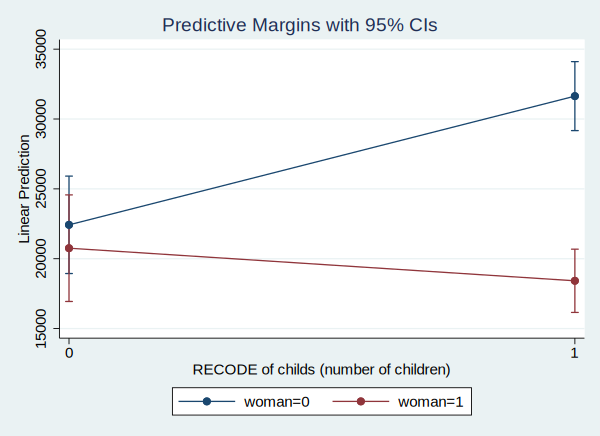


.     global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1
. }            


In [28]:
marginsplot

Here we see the main result clearly: Women (red line) and men (blue line) are close to the left in the graph, without kids. But on the right side of the graph, among those with kids, the difference is stark.

All three graphs are related. The two previus ones, that showed coefficients, show the relationships between the different points in the final graph. The first coefficient graph, that showed the effect of `dum_kids`, shows what happens when we move to the right in the graph, from 0 to 1. The blue line (men) goes up, while the red line (women) goes down.

The second graph, which showed the effect of `woman`, shows what happens when we switch from the blue to the red line. When we are at `dum_kids = 0` we have to do a small jump from the blue to the red line. When `dum_kids = 1` we have to make a large jump down from the blue to the red line.

## Conclusion

The main result from the analysis is thus that gender differences increases dramatically when people have kids. Fathers earn much more than men without kids, while mothers earn less than women without kids. Therefore, men without kids only earn a little more than women without kids, while fathers earn much more than mothers.

Other research has shown reasonable explanations for this, for example that parenthood lead to lower labor participation for women, while men work more to make up for the loss in income. But we cannot say whether that is the case from this cross-sectional analysis. Here, we are only comparing different individuals with each other, and there are a lot of other differences between individuals, that is unaccounted for here. But we have at least controlled for age, so the differences are not due to that.

But in general, we can see that important effects can be hidden when they are averaged out over several subgroups in a sample: the original effect of parenthood was weakly positive, while it turned out to be negative for women, and strongly positive for men.

Furthermore, many of our theories lead to expectations that effects will be different, depending on the value of some third value. In those cases, regression analysis with interaction effects is a good tool.

So far, we have only looked at the special case where both variables are dichotomous, that is, that they only have two values. Things get a little bit more complicated when the variables are continuous, and have many different values. We will discuss that in another guide.